
Complete Table with Weight (g), Actual Price ($), and Predicted Price ($):
           Item  Weight (g)  Price ($)  Predicted_Price ($)
0      Backpack         800         50            68.837599
1           Mug         350         15           197.254963
2    Basketball         600         25           125.911983
3    Sunglasses         150         75           254.329347
4      Notebook         250          5           225.792155
5    Smartphone         200        999           240.060751
6        Pillow         500         20           154.449175
7     Desk Lamp         900         40            40.300407
8  Water Bottle         700         10            97.374791
9  Hiking Boots        1200        120             0.000000

Predicted prices for new weights:
Weight: 400 g, Predicted Price: $182.99
Weight: 1000 g, Predicted Price: $11.76
Weight: 1500 g, Predicted Price: $0.00


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


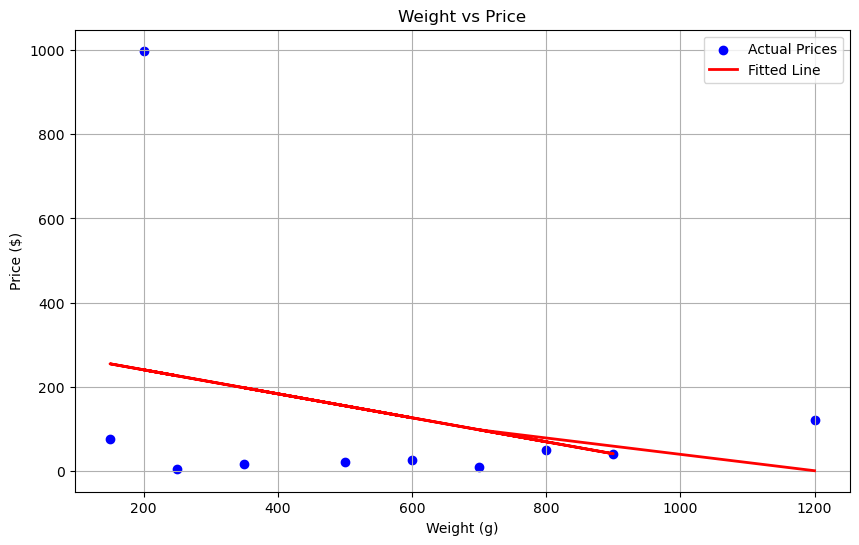

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Define the dataset with the complete table data
data = {
    "Item": [
        "Backpack", "Mug", "Basketball", "Sunglasses", "Notebook",
        "Smartphone", "Pillow", "Desk Lamp", "Water Bottle", "Hiking Boots"
    ],
    "Color": [
        "Blue", "White", "Orange", "Black", "Green",
        "Gray", "White", "Silver", "Transparent", "Brown"
    ],
    "Weight (g)": [800, 350, 600, 150, 250, 200, 500, 900, 700, 1200],
    "Durable": ["Yes", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "Yes"],
    "Price ($)": [50, 15, 25, 75, 5, 999, 20, 40, 10, 120]
}
# Load the dataset into a DataFrame
df = pd.DataFrame(data)
# Check for missing values and handle them (not expected in this dataset)
if df[['Weight (g)', 'Price ($)']].isnull().sum().any():
    print("\nMissing values found. Dropping rows with missing values...")
    df = df.dropna(subset=['Weight (g)', 'Price ($)'])
# Prepare the data
X = df[['Weight (g)']]  # Independent variable (Weight)
y = df['Price ($)']     # Dependent variable (Price)
# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)
# Predict prices for the given weights
predicted_prices = model.predict(X)
# Clip negative predicted prices to zero or a minimum threshold value
predicted_prices_clipped = [max(0, price) for price in predicted_prices]
# Add predicted prices to the DataFrame
df['Predicted_Price ($)'] = predicted_prices_clipped
# Display the table with original and predicted prices
print("\nComplete Table with Weight (g), Actual Price ($), and Predicted Price ($):")
print(df[['Item', 'Weight (g)', 'Price ($)', 'Predicted_Price ($)']])
# Predict the price for new weights
new_weights = [400, 1000, 1500]  # Example weights for prediction
predicted_prices_new = [max(0, model.predict([[weight]])[0]) for weight in new_weights]
# Display the predicted prices for the new weights
print("\nPredicted prices for new weights:")
for weight, predicted_price in zip(new_weights, predicted_prices_new):
    print(f"Weight: {weight} g, Predicted Price: ${predicted_price:.2f}")
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight (g)'], df['Price ($)'], color='blue', label='Actual Prices')
# Plot the regression line
plt.plot(df['Weight (g)'], predicted_prices_clipped, color='red', linewidth=2, label='Fitted Line')
# Label the plot
plt.title('Weight vs Price')
plt.xlabel('Weight (g)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()
